# Analysis of Qualitative Runs

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt, animation
import xarray as xr
import numpy as np
import pandas as pd
import cmocean as cm
from datetime import datetime
from IPython.display import HTML
import netCDF4 as nc

## load CIOPS mesh

In [22]:
mesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

## test run with SalishSeaCast

In [23]:
SSCmesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [43]:
#multiple particles, deeper in
# file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/tidesback_longer_forward_01mar19/ariane_trajectories_qualitative.nc')
# file2 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_w_longer_forward_01mar19/ariane_trajectories_qualitative.nc')
# file3 = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_qual/og_now_longer_forward_01mar19/ariane_trajectories_qualitative.nc')

file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget2_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')

file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget3_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc') # Main Bay
file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPugetSaratoga_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPugetSeattle_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc') 


/tmp/ipykernel_1443387/3799289609.py:6: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
/tmp/ipykernel_1443387/3799289609.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file3 = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualExPuget_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')
/tmp/ipykernel_1443387/3799289609.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' i

<xarray.Dataset> Size: 384B
Dimensions:       (ntraj: 4, nb_output: 0)
Dimensions without coordinates: ntraj, nb_output
Data variables: (12/19)
    init_x        (ntraj) float64 32B ...
    init_y        (ntraj) float64 32B ...
    init_z        (ntraj) float64 32B ...
    init_t        (ntraj) float64 32B ...
    init_age      (ntraj) timedelta64[ns] 32B ...
    init_transp   (ntraj) float64 32B ...
    ...            ...
    traj_lat      (nb_output, ntraj) float64 0B ...
    traj_depth    (nb_output, ntraj) float64 0B ...
    traj_time     (nb_output, ntraj) float64 0B ...
    traj_temp     (nb_output, ntraj) float32 0B ...
    traj_salt     (nb_output, ntraj) float32 0B ...
    traj_dens     (nb_output, ntraj) float32 0B ...
Attributes: (12/96)
    key_roms:                  .FALSE.
    key_mars:                  .FALSE.
    key_symphonie:             .FALSE.
    key_B2C_grid:              .FALSE.
    key_sequential:            .TRUE.
    key_alltracers:            .TRUE.
    ...                        ...
    ind0_sa:                   1
    indn_sa:                   361
    maxsize_sa:                6
    c_suffix_sa:               _grid_T.nc
    nc_var_sa:                 vosaline
    nc_att_mask_sa:            NONE

/tmp/ipykernel_1443387/2022631307.py:3: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  file_new = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')


IndexError: index 0 is out of bounds for axis 0 with size 0

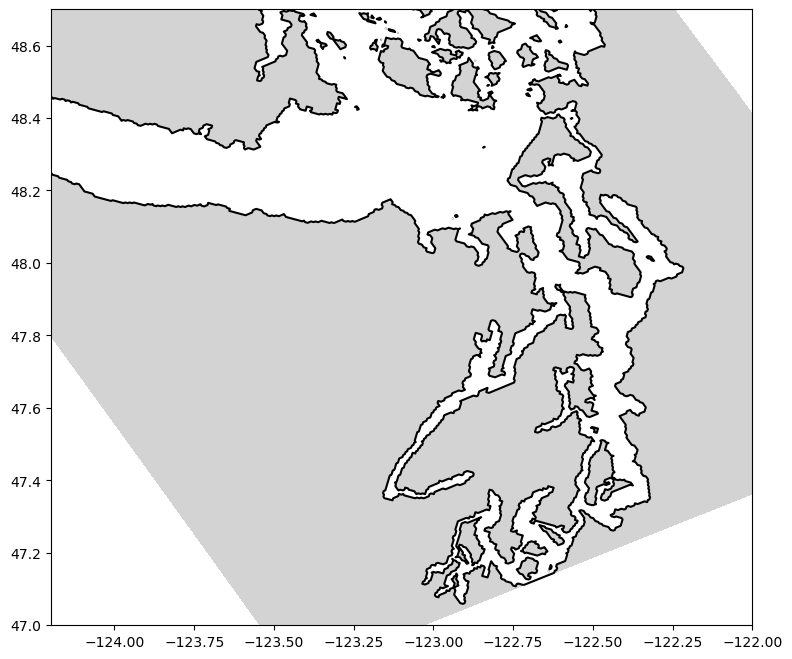

In [42]:
# compare to new compute w that Susan did
#multiple particles, deeper in
file_new = xr.open_dataset('/ocean/ghoeven/MOAD/analysis-griffon/Ariane/qualEx_1hr/new_compw_forward_01jan18/ariane_trajectories_qualitative.nc')

fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.contourf(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.2, -122])
ax.set_ylim([47, 48.7])
ax.set_aspect(5/4.4)

ax.plot(file3.traj_lon,file3.traj_lat, label='original compute W')
ax.scatter(file3.traj_lon[0],file3.traj_lat[0],color='0.30',marker='s')
ax.set_title("original, compute W")
ax.set_xlabel('lon')
ax.set_ylabel('lat')

# ax[1].contourf(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
# ax[1].contour(SSCmesh.nav_lon, SSCmesh.nav_lat, SSCmesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
# ax[1].set_xlim([-124.9, -122.5])
# ax[1].set_ylim([47.5, 49])
# ax[1].set_aspect(5/4.4)

# ax[1].plot(file_new.traj_lon,file_new.traj_lat, label='new compute W')
# ax[1].scatter(file_new.traj_lon[0],file_new.traj_lat[0],color='0.30',marker='s')
# ax[1].set_title("new compute W")
# ax[1].set_xlabel('lon')
# ax[1].set_ylabel('lat')

(-0.05, 1.05)

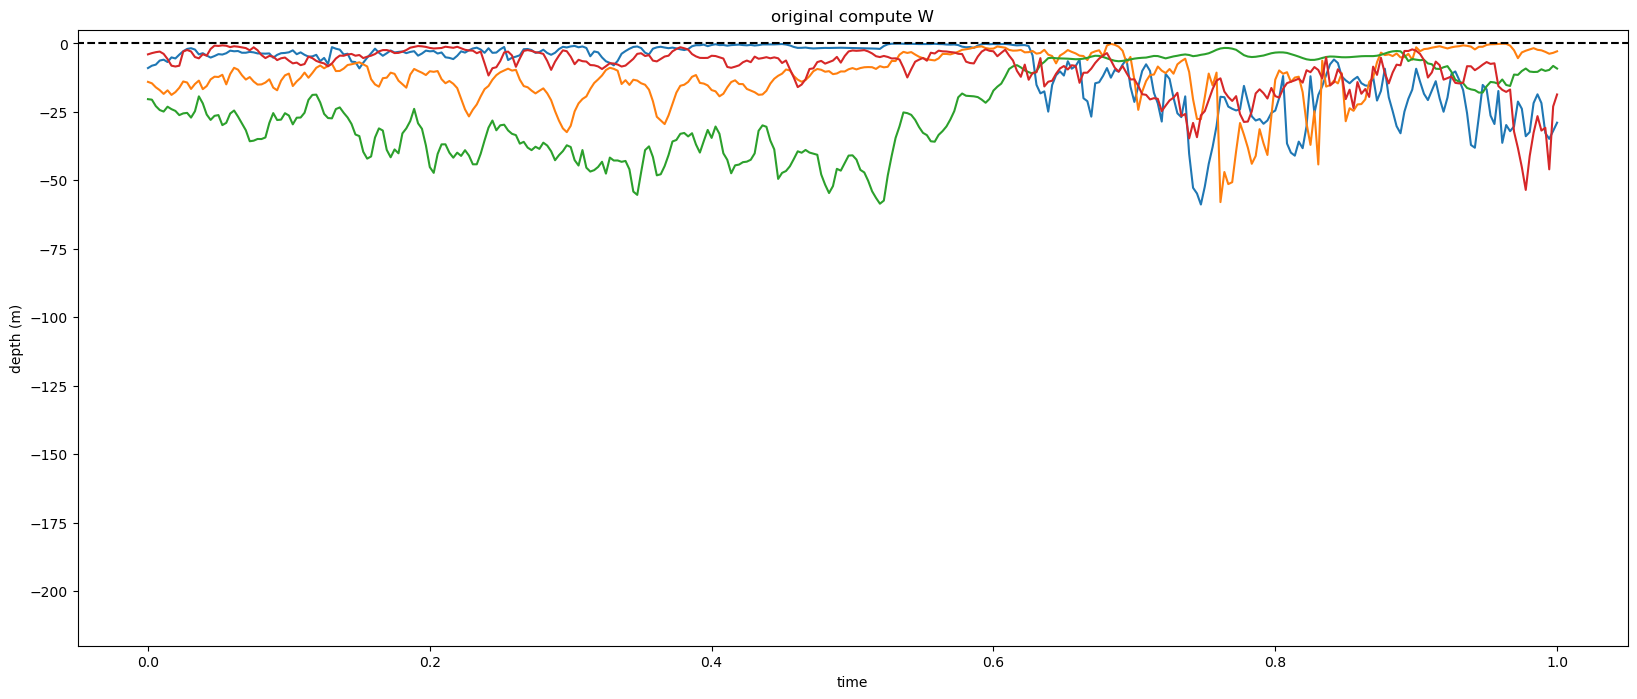

In [36]:
fig, ax = plt.subplots(1,1,figsize=(20,8))

ax.plot(file3.traj_time, file3.traj_depth)
ax.set_ylabel("depth (m)")
ax.set_xlabel("time")
ax.set_title("original compute W")
ax.set_ylim([-220,5])
ax.plot([-1,2.1],[0,0],'k--')
ax.set_xlim([-0.05,1.05])

# ax[1].plot(file_new.traj_time, file_new.traj_depth)
# ax[1].set_ylabel("depth (m)")
# ax[1].set_xlabel("time")
# ax[1].set_title("new compute W")
# ax[1].set_ylim([-220,5])
# ax[1].plot([-1,2.1],[0,0],'k--')
# ax[1].set_xlim([-0.05,1.05])

# ax[2].plot(file2.traj_time, file2.traj_depth)
# ax[2].set_ylabel("depth (m)")
# ax[2].set_xlabel("time")
# ax[2].set_title("original")
# ax[2].set_ylim([-220,5])
# ax[2].plot([-1,2.1],[0,0],'k--')
# ax[2].set_xlim([-0.05,1.05])

## CIOPS BC12
#### first: lets make some smart choices about where to put the particles!

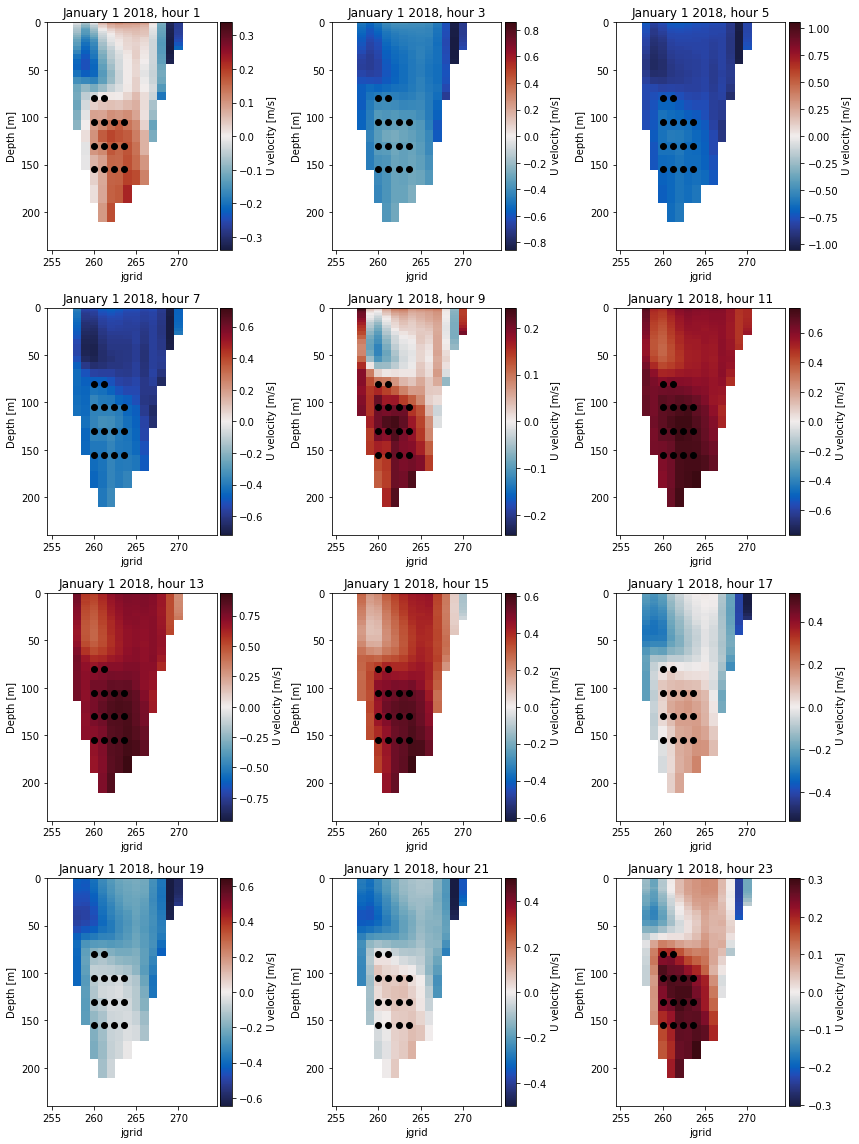

In [4]:
nc_file = "/ocean/rbeutel/data/201701/U_new_20170101.nc"
nc_to_plot = nc.Dataset(nc_file)
mesh_nc = nc.Dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')

# hours = [0, 3, 6, 12, 15, 18, 21, 24]
hours = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

variable = 'vozocrtx'
fig, ax= plt.subplots(nrows=4, ncols=3, figsize =(12,16))

igrid = 646-1
latS = 255
latN = 275
k = 0

for hour in hours:
    data = nc_to_plot[variable][hour,:,latS:latN,igrid]
    # X, Y = np.meshgrid(nc_to_plot['nav_lat'][646,255:273], nc_to_plot['depthu'])
    section_slice = np.arange(latS,latN)
    zlevels = mesh_nc['gdept_1d'][:][0]
    X, Y = np.meshgrid(section_slice, zlevels)
    tmesh = ax[hour//6,k].pcolormesh(X,Y,data, cmap = cm.cm.balance, \
                          vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))

    ax[hour//6,k].set_ylim([0,240])
    ax[hour//6,k].invert_yaxis()
    ax[hour//6,k].set_ylabel('Depth [m]')
    ax[hour//6,k].set_xlabel('jgrid')
    ax[hour//6,k].set_title('January 1 2018, hour '+str(hour+1))
    
    cbar = fig.colorbar(tmesh, ax=ax[hour//6,k], orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
    cbar.set_label(label=' U velocity [m/s]') 
    
    # particle location evenly arangedthrough lower half of water column
#     ax[hour//6,k].scatter([260,260,260,262.3,262.3,262.3,262.3,264.7,264.7,264.7,264.7,267,267,267],[90,120,150, 90,120, 150, 180, 90,120, 150, 180,90, 120, 150],c='k')
    # particle location focused in area of high influx (from SSC JR CSs)
    ax[hour//6,k].scatter([260,260,260,260,261.2,261.2,261.2,261.2,262.4,262.4,262.4,263.6,263.6,263.6],[80,105,130,155,80,105,130,155,105,130,155,105,130,155],c='k')
    #once i get CIOPS to work i honestly think i should do both particle location schemes
    
    if k ==2:
        k = 0
    else:
        k +=1 
    
plt.tight_layout()

# ax[1].scatter([261,261,261,263.5,263.5,263.5,263.5,266,266,266],[90,120,150, 90,120, 150, 180, 90, 120, 150],c='k')

In [10]:
#now for ariane you cannot set the position at a depth of 90 bc that will put it incell 90 (which doesn't exist)
#instead find with depth grid cell that best corresponds with the positions you chose above
[(x,y) for (x,y) in enumerate(zlevels)]

[(0, 0.507530023512452),
 (1, 1.557569488842656),
 (2, 2.6693409194084996),
 (3, 3.857884935301262),
 (4, 5.141913831146915),
 (5, 6.544535333853228),
 (6, 8.093971465979628),
 (7, 9.824157673695284),
 (8, 11.775044353140647),
 (9, 13.992364711100425),
 (10, 16.52661505451083),
 (11, 19.43106879090391),
 (12, 22.758861118719427),
 (13, 26.559531476793033),
 (14, 30.875785062827266),
 (15, 35.74142752531527),
 (16, 41.181253706626364),
 (17, 47.21313511579986),
 (18, 53.85189559955382),
 (19, 61.11412039354691),
 (20, 69.02298960174267),
 (21, 77.61249605846115),
 (22, 86.93079063628434),
 (23, 97.04271072951805),
 (24, 108.03171341445899),
 (25, 120.0014691078047),
 (26, 133.0773268246376),
 (27, 147.4077864359136),
 (28, 163.16603544640805),
 (29, 180.55153922041305),
 (30, 199.79161550620404),
 (31, 221.14287374964496),
 (32, 244.8923539986389),
 (33, 271.3581577853082),
 (34, 300.8893252934304),
 (35, 333.8646831888884),
 (36, 370.6903722478645),
 (37, 411.79577220550027),
 (38, 457

SO 90 m=22, 120 m=25, 150 m=27, and 180 m=29

## plot 2D trajectories

In [16]:
def plt_qual_2D(month, year,ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.gray_r, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_depth, vmax=0, vmin=-100, cmap=cm.cm.deep_r, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='r',marker='*', zorder=4)
            
    # ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)
    ax.set_title(month+ " 20"+str(year) , fontsize=16)

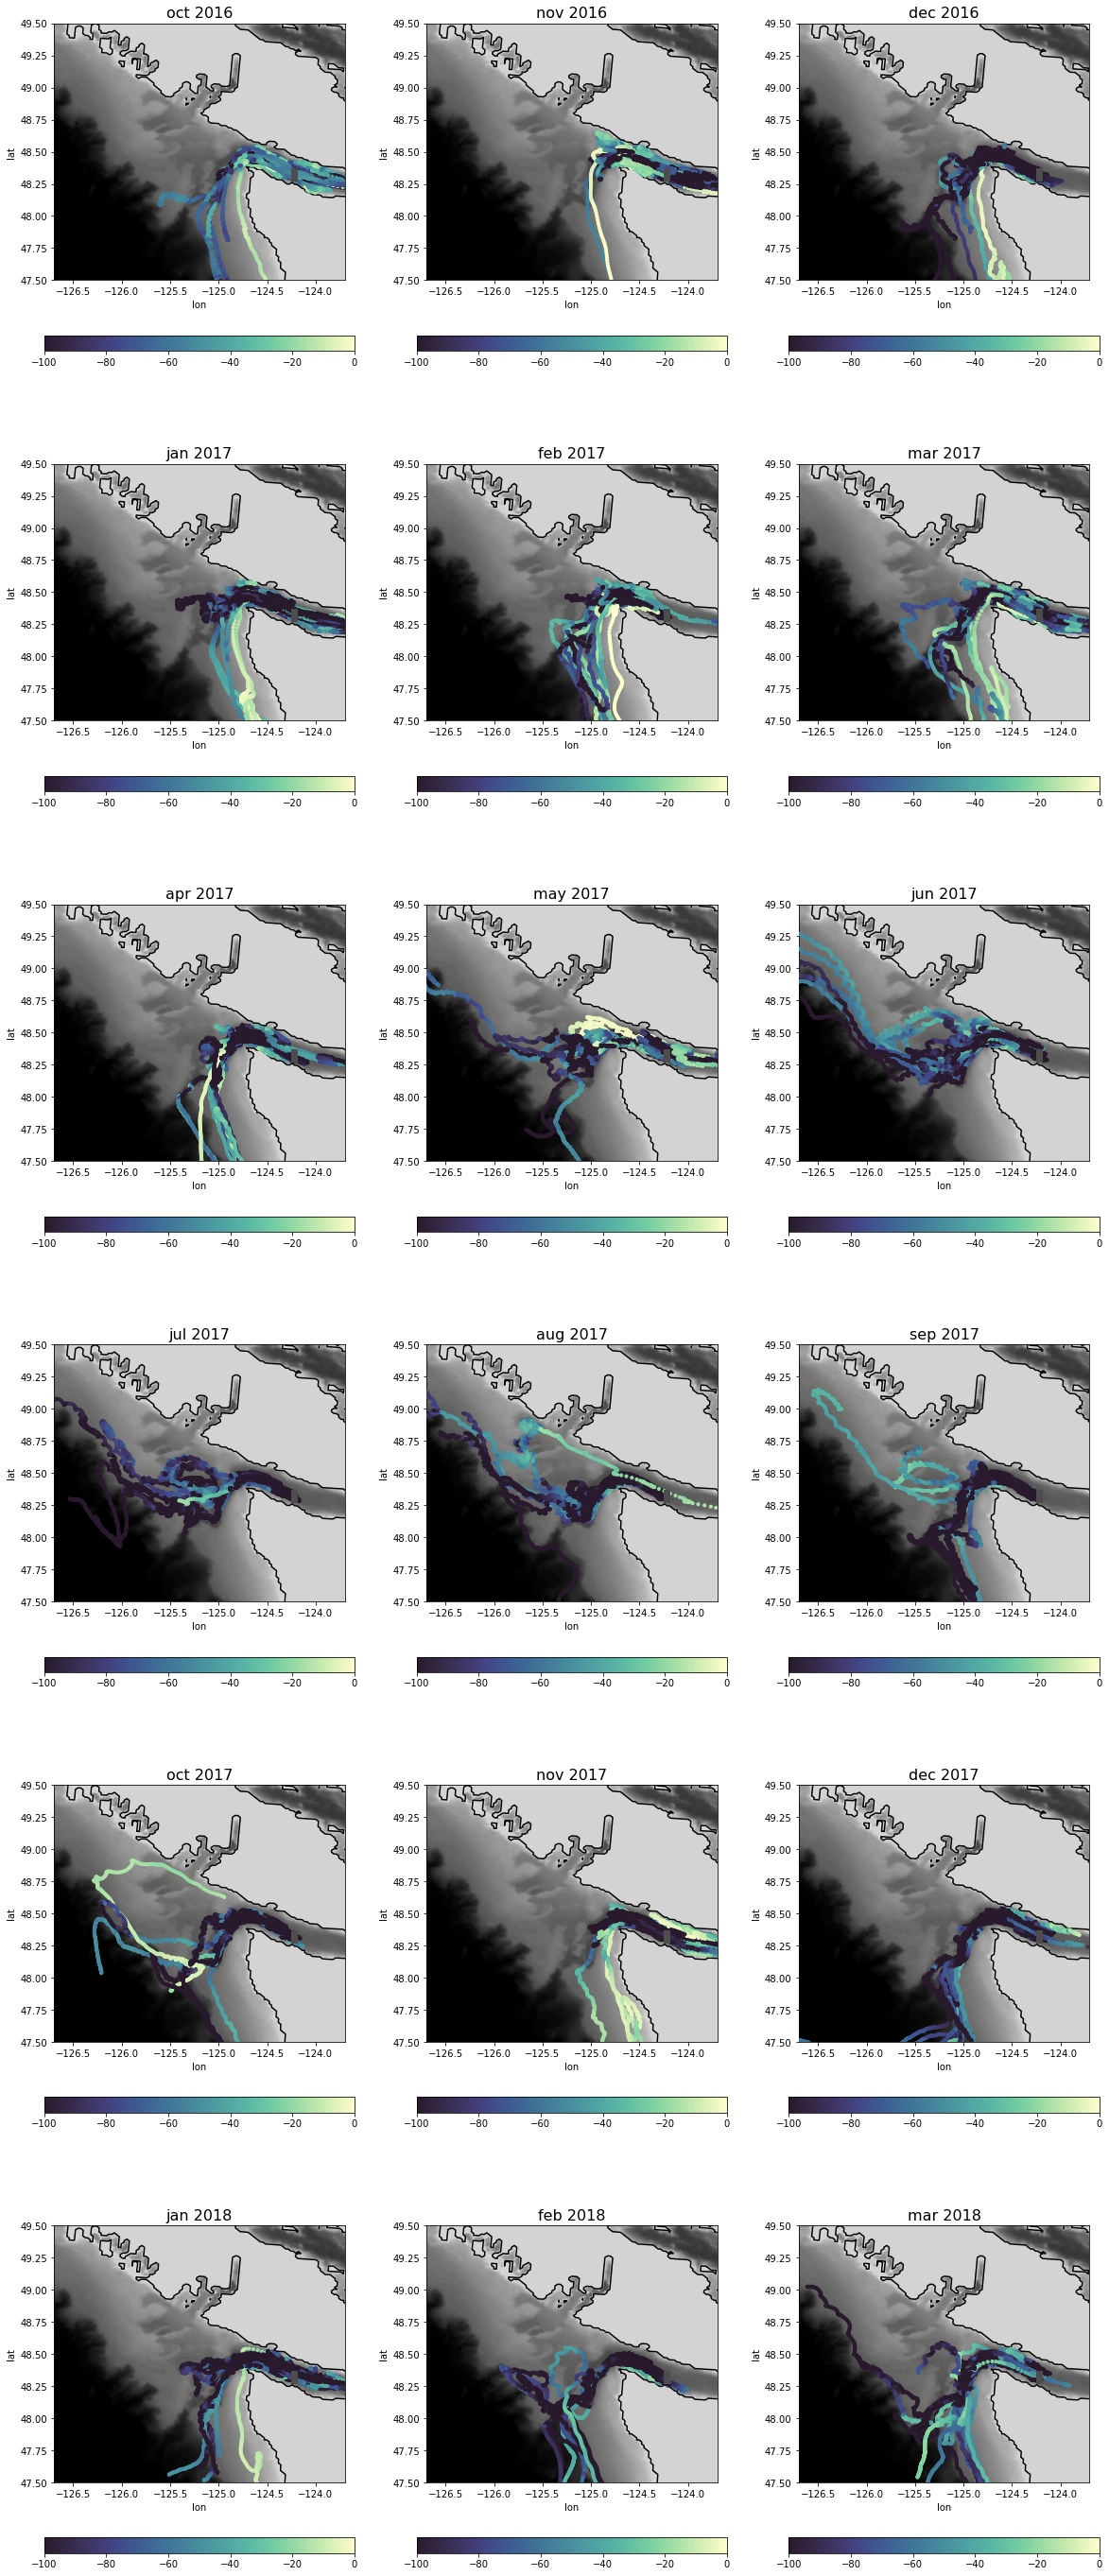

In [17]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_qual_2D('oct', 16, ax[0,0])
plt_qual_2D('nov', 16, ax[0,1])
plt_qual_2D('dec', 16, ax[0,2])

plt_qual_2D('jan', 17, ax[1,0])
plt_qual_2D('feb', 17, ax[1,1])
plt_qual_2D('mar', 17, ax[1,2])
plt_qual_2D('apr', 17, ax[2,0])
plt_qual_2D('may', 17, ax[2,1])
plt_qual_2D('jun', 17, ax[2,2])
plt_qual_2D('jul', 17, ax[3,0])
plt_qual_2D('aug', 17, ax[3,1])
plt_qual_2D('sep', 17, ax[3,2])
plt_qual_2D('oct', 17, ax[4,0])
plt_qual_2D('nov', 17, ax[4,1])
plt_qual_2D('dec', 17, ax[4,2])

plt_qual_2D('jan', 18, ax[5,0])
plt_qual_2D('feb', 18, ax[5,1])
plt_qual_2D('mar', 18, ax[5,2])

In [3]:
def plt_dens_2D(month, year, ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.gray_r, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
#     ax.set_title(month+' '+str(year), fontsize=16)
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_dens,vmin=23, vmax=28,cmap=cm.cm.solar, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='cyan',marker='*', zorder=4)
            
    # ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)
    ax.set_title(month+ " 20"+str(year) , fontsize=16)

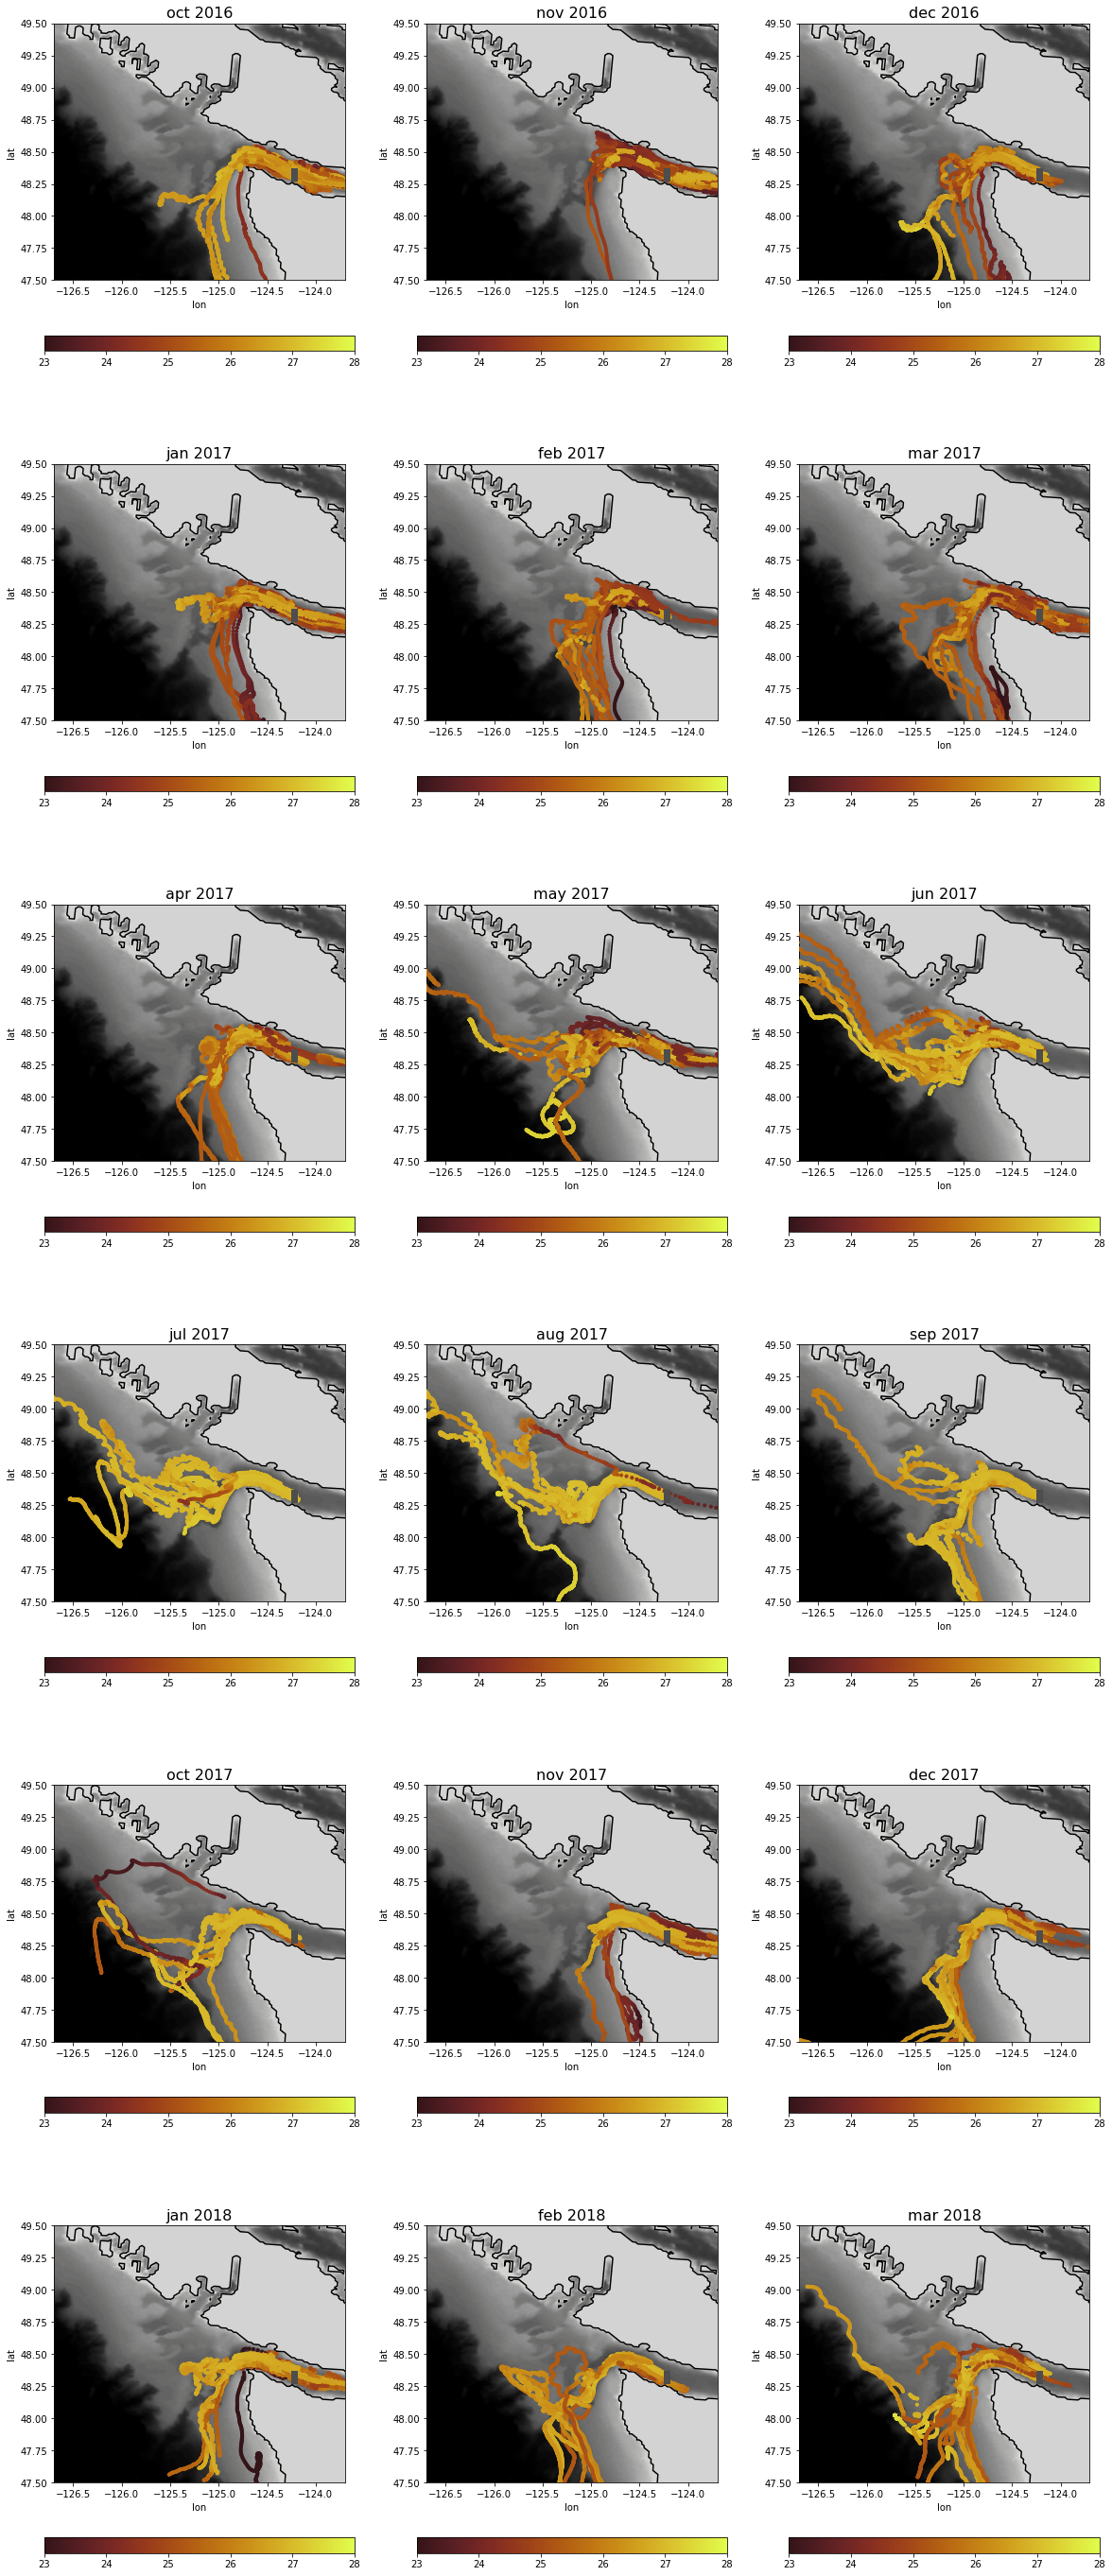

In [4]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_dens_2D('oct', 16, ax[0,0])
plt_dens_2D('nov', 16, ax[0,1])
plt_dens_2D('dec', 16, ax[0,2])

plt_dens_2D('jan', 17, ax[1,0])
plt_dens_2D('feb', 17, ax[1,1])
plt_dens_2D('mar', 17, ax[1,2])
plt_dens_2D('apr', 17, ax[2,0])
plt_dens_2D('may', 17, ax[2,1])
plt_dens_2D('jun', 17, ax[2,2])
plt_dens_2D('jul', 17, ax[3,0])
plt_dens_2D('aug', 17, ax[3,1])
plt_dens_2D('sep', 17, ax[3,2])
plt_dens_2D('oct', 17, ax[4,0])
plt_dens_2D('nov', 17, ax[4,1])
plt_dens_2D('dec', 17, ax[4,2])

plt_dens_2D('jan', 18, ax[5,0])
plt_dens_2D('feb', 18, ax[5,1])
plt_dens_2D('mar', 18, ax[5,2])

In [5]:
def plt_salt_2D(month, year, ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.gray_r, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
#     ax.set_title(month+' '+str(year), fontsize=16)
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_salt,vmin=29, vmax=34,cmap=cm.cm.amp, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal')
    cbar.set_label(label=' Salinity [g/kg]') 
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='cyan',marker='*', zorder=4)
            
    # ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)
    ax.set_title(month+ " 20"+str(year) , fontsize=16)

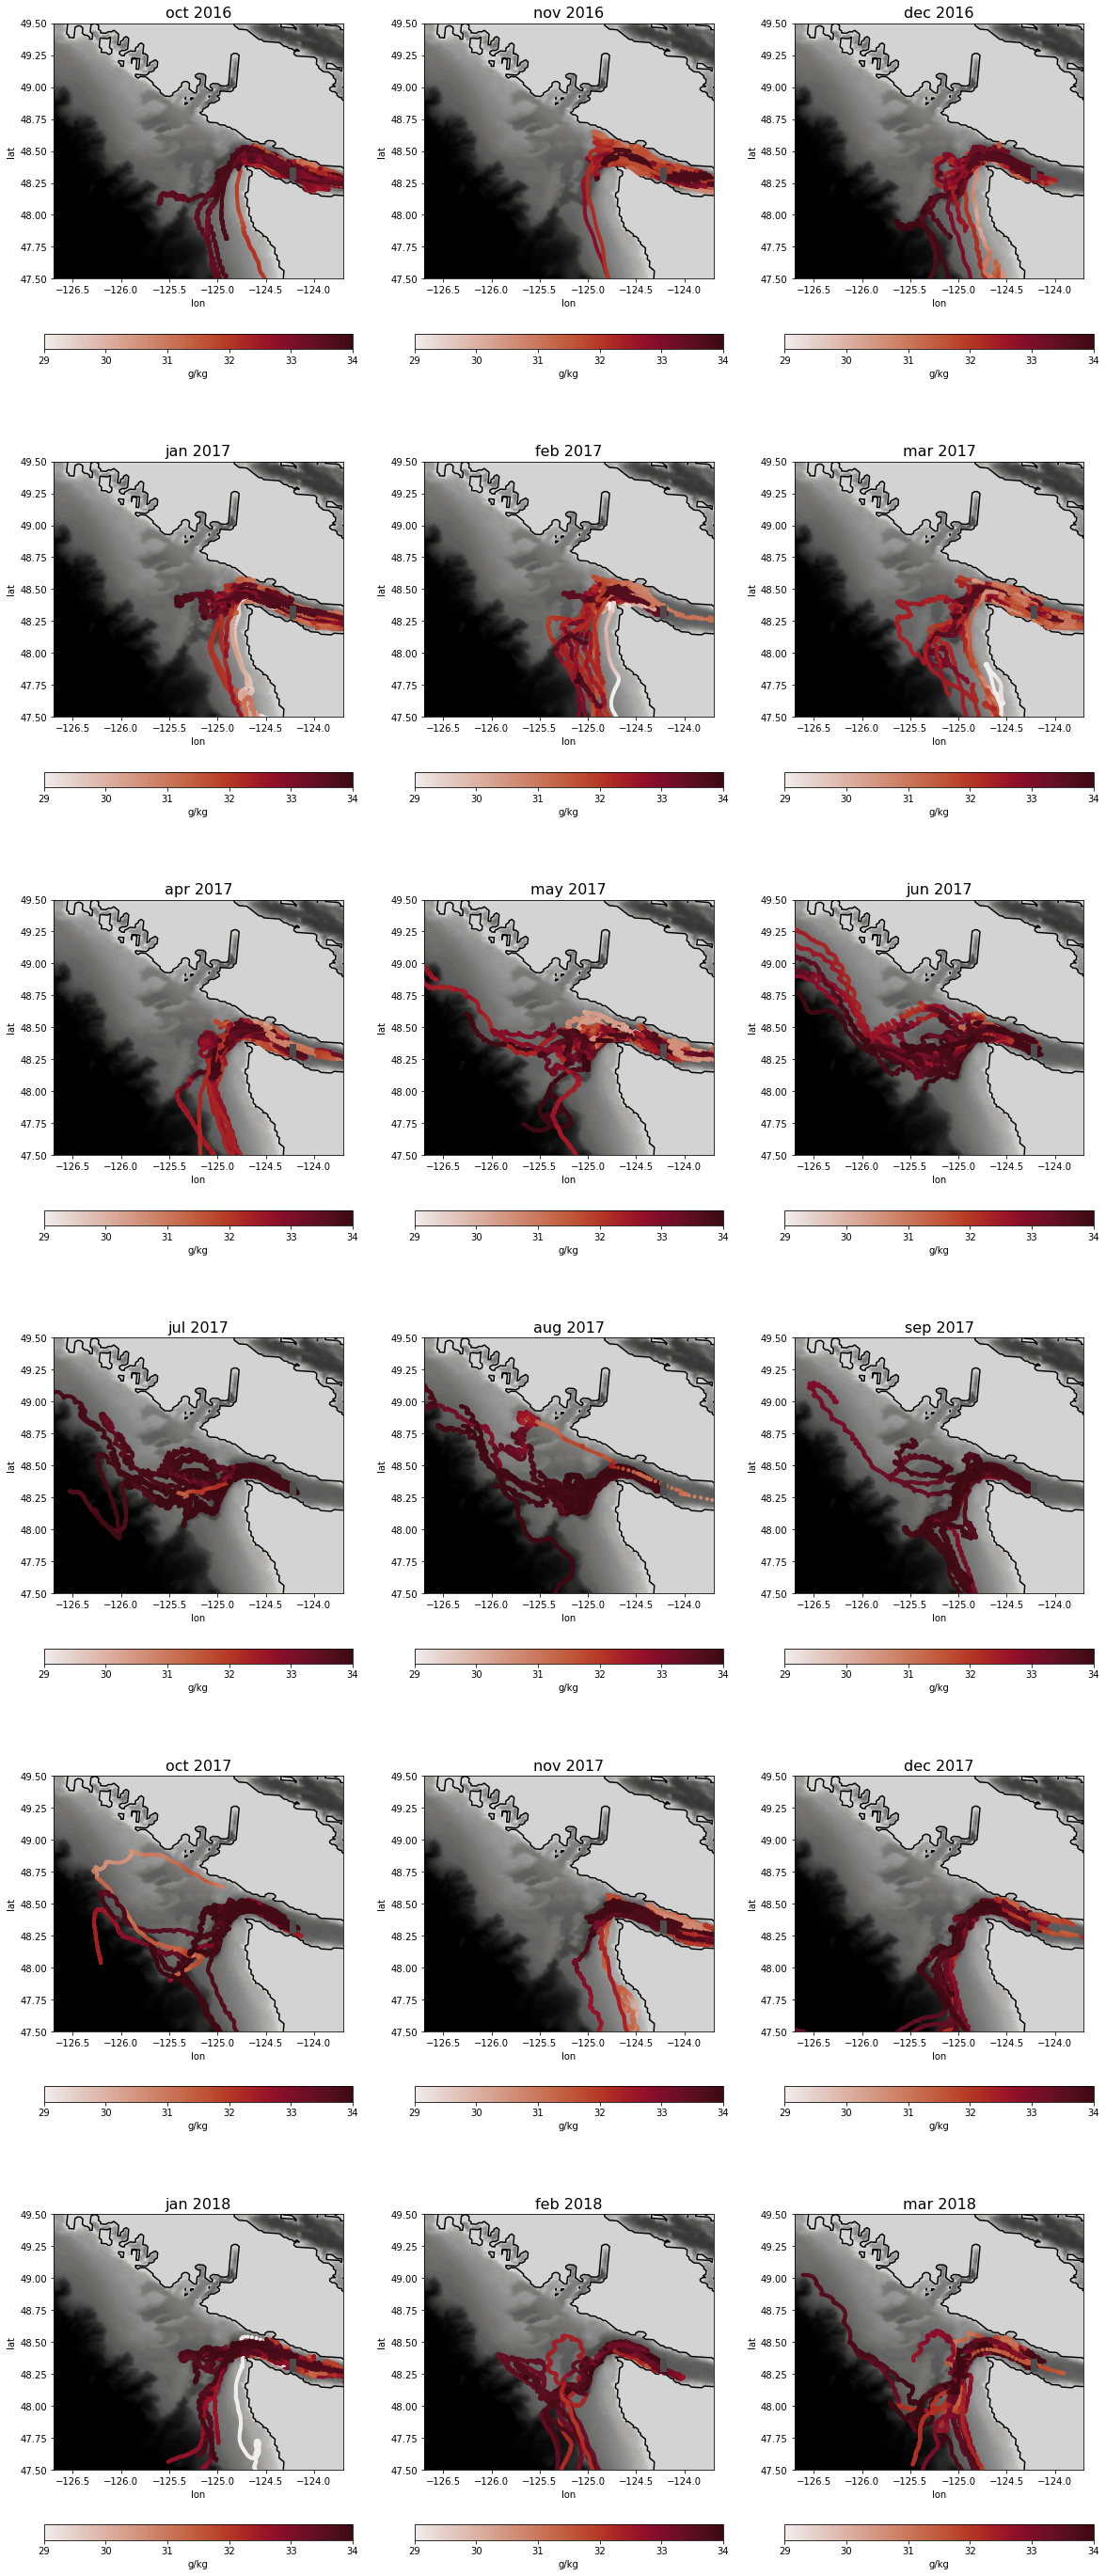

In [6]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_salt_2D('oct', 16, ax[0,0])
plt_salt_2D('nov', 16, ax[0,1])
plt_salt_2D('dec', 16, ax[0,2])

plt_salt_2D('jan', 17, ax[1,0])
plt_salt_2D('feb', 17, ax[1,1])
plt_salt_2D('mar', 17, ax[1,2])
plt_salt_2D('apr', 17, ax[2,0])
plt_salt_2D('may', 17, ax[2,1])
plt_salt_2D('jun', 17, ax[2,2])
plt_salt_2D('jul', 17, ax[3,0])
plt_salt_2D('aug', 17, ax[3,1])
plt_salt_2D('sep', 17, ax[3,2])
plt_salt_2D('oct', 17, ax[4,0])
plt_salt_2D('nov', 17, ax[4,1])
plt_salt_2D('dec', 17, ax[4,2])

plt_salt_2D('jan', 18, ax[5,0])
plt_salt_2D('feb', 18, ax[5,1])
plt_salt_2D('mar', 18, ax[5,2])

In [7]:
def plt_temp_2D(month, year, ax):
    
    n = 14 #number of particles being tracked
    
    if month == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+month+str(year)+'/ariane_trajectories_qualitative.nc')
    
    # Bathymetry
    c = ax.contourf(
    mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
    cmap=cm.cm.gray_r, extend='max',zorder=0,
    )
    
    # "Mapping"
    ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
    ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
    ax.set_xlim([-126.7, -123.7])
    ax.set_ylim([47.5, 49.5])
    ax.set_aspect(1/np.sin(np.deg2rad(49)))
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
#     ax.set_title(month+' '+str(year), fontsize=16)
    
    # Particle trajectories and depth
    im = ax.scatter(file.traj_lon,file.traj_lat, c=file.traj_temp,vmin=5, vmax=13,cmap=cm.cm.matter, s=10,zorder=3)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal',label='$^\circ C$')
    ax.scatter(file.traj_lon[0],file.traj_lat[0],color='0.30',marker='s', zorder=4) # start location
    
    # End locations
    last_point= [pd.DataFrame(file.traj_lat[:,i]).last_valid_index() for i in range(n)]
    k=0
    for i in range(n):
        if last_point[i] < len(file.traj_lat)-2:
            k+=1
            ax.scatter(file.traj_lon[last_point[i],i],file.traj_lat[last_point[i],i],color='cyan',marker='*', zorder=4)
            
    # ax.set_title(month + "\nparticles leaving surface = "+str(k), fontsize=16)
    ax.set_title(month+ " 20"+str(year) , fontsize=16)

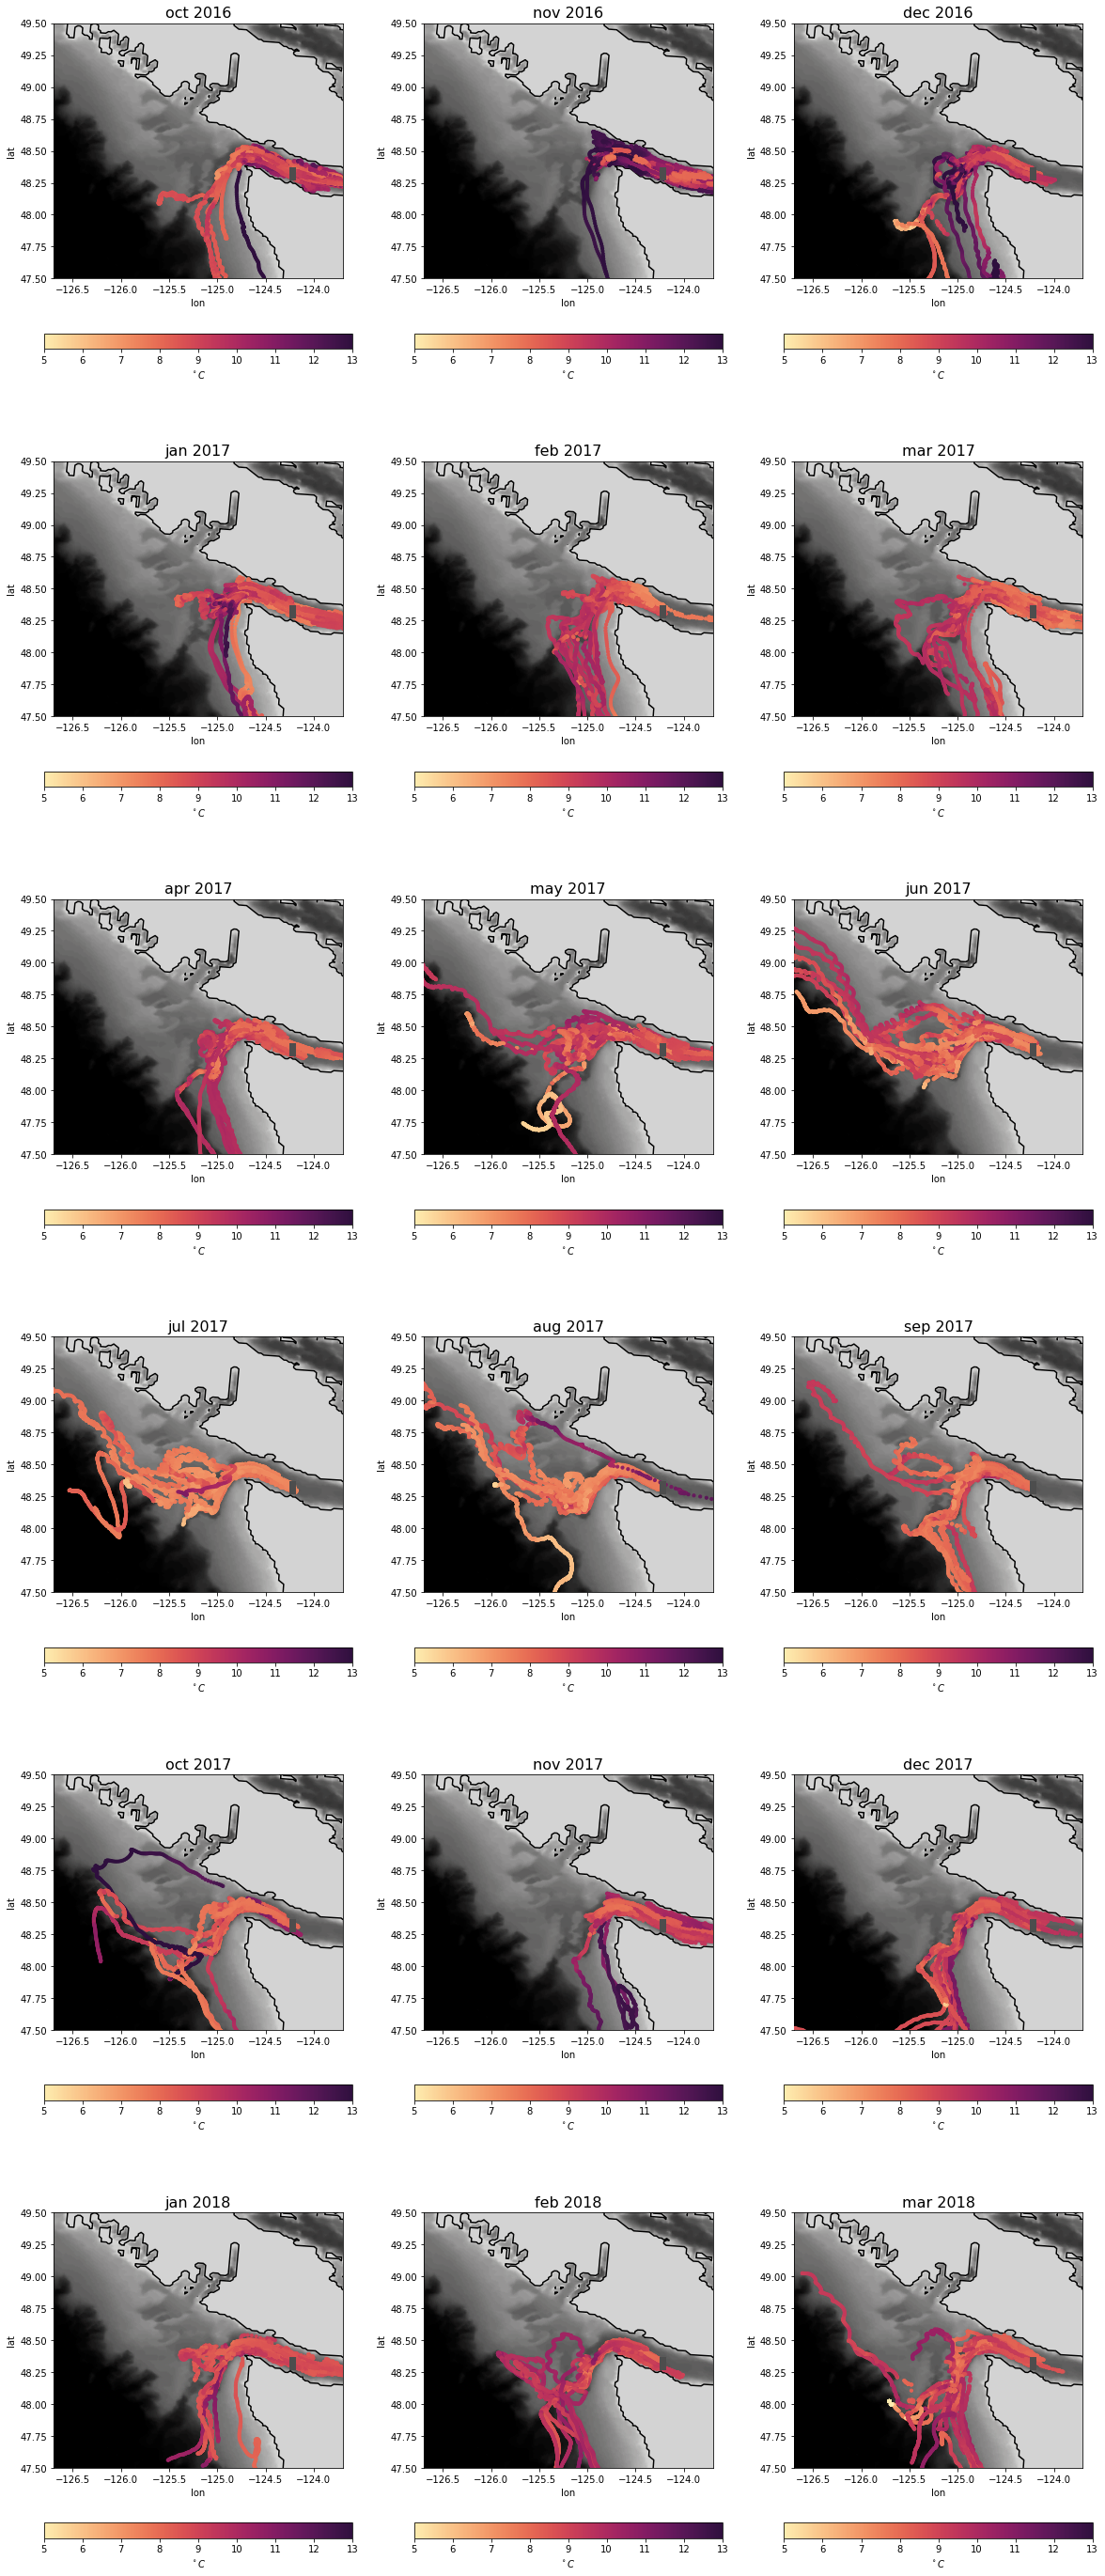

In [8]:
fig, ax = plt.subplots(6,3,figsize=(20, 50))

plt_temp_2D('oct', 16, ax[0,0])
plt_temp_2D('nov', 16, ax[0,1])
plt_temp_2D('dec', 16, ax[0,2])

plt_temp_2D('jan', 17, ax[1,0])
plt_temp_2D('feb', 17, ax[1,1])
plt_temp_2D('mar', 17, ax[1,2])
plt_temp_2D('apr', 17, ax[2,0])
plt_temp_2D('may', 17, ax[2,1])
plt_temp_2D('jun', 17, ax[2,2])
plt_temp_2D('jul', 17, ax[3,0])
plt_temp_2D('aug', 17, ax[3,1])
plt_temp_2D('sep', 17, ax[3,2])
plt_temp_2D('oct', 17, ax[4,0])
plt_temp_2D('nov', 17, ax[4,1])
plt_temp_2D('dec', 17, ax[4,2])

plt_temp_2D('jan', 18, ax[5,0])
plt_temp_2D('feb', 18, ax[5,1])
plt_temp_2D('mar', 18, ax[5,2])

## trajectory animations

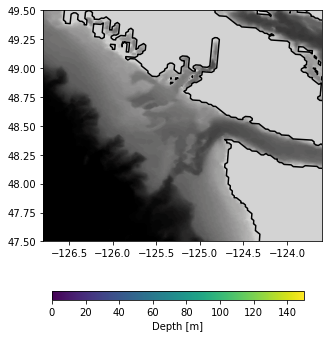

In [21]:
# Make initial animation figure
fig, ax = plt.subplots(figsize=(5, 6))
cax = fig.add_axes([0.15, 0.25, 0.7, 0.02])


ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-126.8, -123.6])
ax.set_ylim([47.5, 49.5])
ax.set_aspect(1/np.sin(np.deg2rad(49)))

l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
fig.colorbar(l, cax=cax, orientation='horizontal',label='Depth [m]')
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)

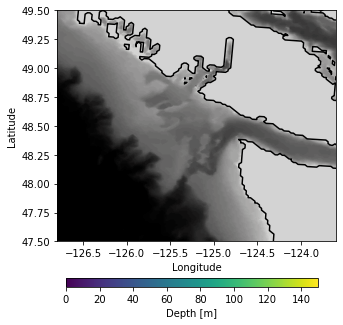

In [28]:
#lets animate may for the summer and feb for the winter
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30jun17/ariane_trajectories_qualitative.nc')

# Make initial animation figure
fig, ax = plt.subplots(figsize=(5, 6))
cax = fig.add_axes([0.15, 0.13, 0.7, 0.02])

l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)

ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-126.8, -123.6])
ax.set_ylim([47.5, 49.5])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

fig.colorbar(l, cax=cax, orientation='horizontal',label='Depth [m]')
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)


# Init function
def init():
    t.set_text('')
    # l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(file.nb_output)-1, interval=50, blit=True)

### Summer (may)

In [29]:
HTML(anim.to_html5_video())

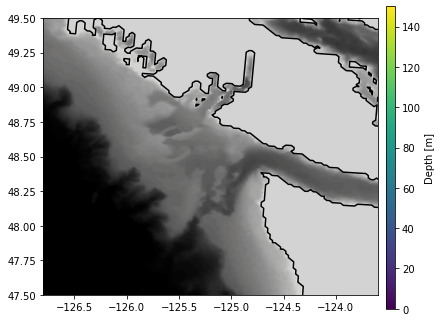

In [9]:
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28feb17/ariane_trajectories_qualitative.nc')

# Make initial animation figure
fig, ax = plt.subplots(figsize=(6, 6))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-126.8, -123.6])
ax.set_ylim([47.5, 49.5])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:]*-1)
    return l, t,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(file.nb_output)-1, interval=50, blit=True)

### Winter (feb 2017)

In [10]:
HTML(anim.to_html5_video())

### Which way do they move in the eddy?

In [11]:
file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/backward_30jul17/ariane_trajectories_qualitative.nc')

# Make initial animation figure
fig, ax = plt.subplots(figsize=(6, 6))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
l = ax.scatter([], [], s=50, c=[], vmin=0, vmax=150, edgecolor='k')
t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-127.7, -122.7])
ax.set_ylim([46, 51])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
fig.colorbar(l, cax=cax, label='Depth [m]')
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)

# Init function
def init():
    t.set_text('')
    l.set_offsets(np.empty((0, 2)))
    l.set_array(np.empty(0))
    return l, t,

# Animate function
def animate(hour):
    l.set_offsets(np.vstack([file.traj_lon[hour,:], file.traj_lat[hour,:]]).T)
    l.set_array(file.traj_depth[hour,:]*-1)
    return l,t ,

# Build animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=480, interval=50, blit=True)

FileNotFoundError: [Errno 2] No such file or directory: b'/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/backward_30jul17/ariane_trajectories_qualitative.nc'

In [ ]:
HTML(anim.to_html5_video())

### Note on run length
- the particles dont get that far in the 20 day runs not that we actually have everything setup "correctly" 
- not surprising though I guess since Saurav's results suggeste that about half of the particles take more than 150 to get to the JdF
- run for 150 days instead of 20, many particles in the winter will leave through the surface before then but that is fine

# plots of final position

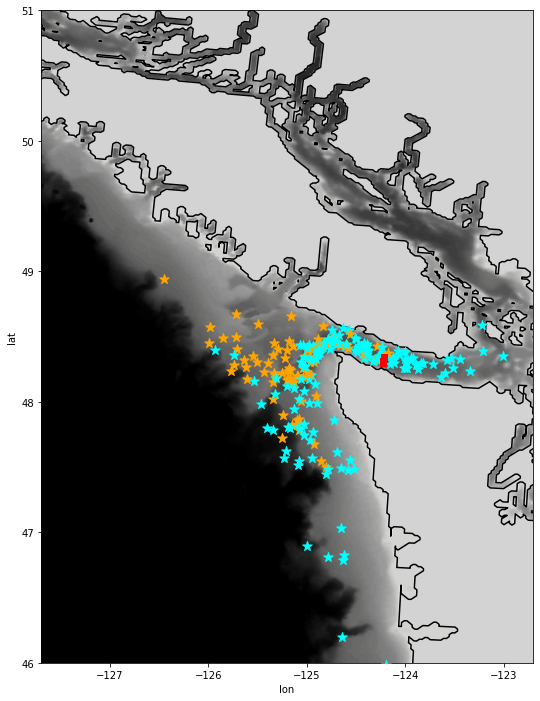

In [4]:
fig, ax = plt.subplots(figsize=(15,12))

# Bathymetry
c = ax.contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0,
)
    
# "Mapping"
ax.contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
ax.contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
ax.set_xlim([-127.7, -122.7])
ax.set_ylim([46, 51])
ax.set_aspect(1/np.sin(np.deg2rad(49)))
ax.set_xlabel('lon')
ax.set_ylabel('lat')
# ax.set_title(month, fontsize=16)

n = 14 #number of particles being tracked

col = ['cyan','cyan','cyan','cyan','cyan','cyan','orange','orange','orange','orange','orange','orange','cyan','cyan','cyan','cyan','cyan','cyan']
months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17','jun17','jul17','aug17','sep17','oct17','nov17','dec17','jan18','feb18','mar18']
# months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17']
for j in range(len(months)):
    if months[j][:3] == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+months[j]+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+months[j]+'/ariane_trajectories_qualitative.nc')
    
    for i in range(n):
        if abs(file.traj_depth[479,i]-file.traj_depth[478,i])>0.001:
#             scat = ax.scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=j,cmap=cm.cm.phase, vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)
            scat = ax.scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=col[j],vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)

# cbar = fig.colorbar(scat,ax=ax, extend='max',label="month")
# cbar.ax.set_yticklabels([months[0],months[2],months[4],months[6],months[8],months[10],months[12],months[14],months[16]])
ax.scatter(file.traj_lon[0],file.traj_lat[0],color='r',marker='s', zorder=4) # start location

Text(0.5, 1.0, 'Summer')

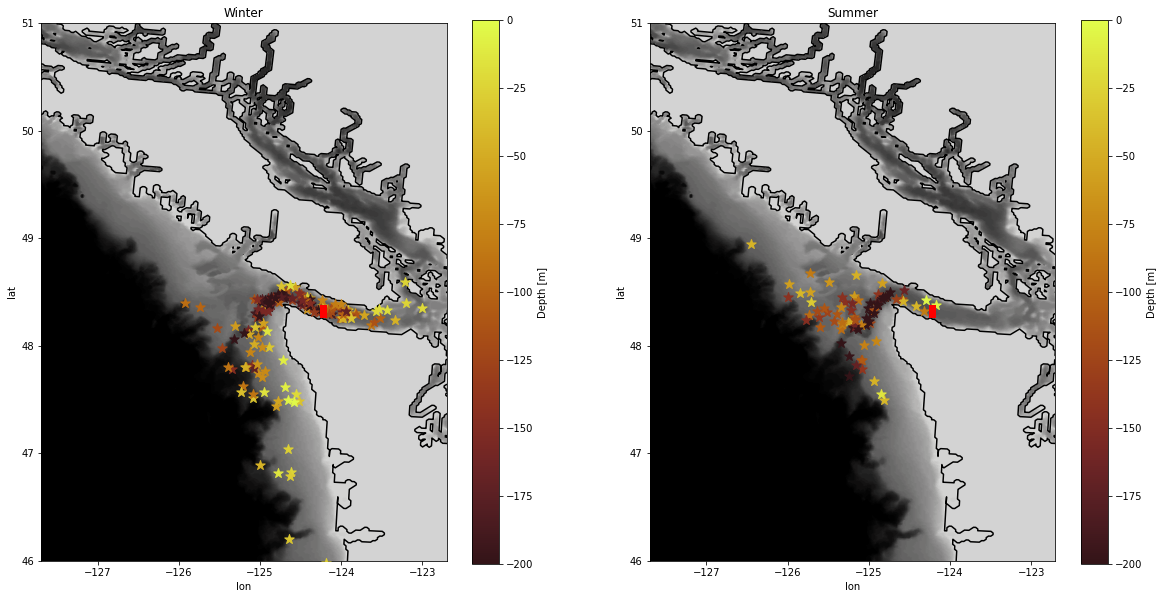

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

#WINTER
# Bathymetry
c = ax[0].contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0, 
)
    
# "Mapping"
ax[0].contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
ax[0].contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
ax[0].set_xlim([-127.7, -122.7])
ax[0].set_ylim([46, 51])
ax[0].set_aspect(1/np.sin(np.deg2rad(49)))
ax[0].set_xlabel('lon')
ax[0].set_ylabel('lat')
# ax.set_title(month, fontsize=16)

n = 14 #number of particles being tracked

months = ['oct16','nov16','dec16','jan17','feb17','mar17','oct17','nov17','dec17','jan18','feb18','mar18']
# months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17']
for j in range(len(months)):
    if months[j][:3] == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+months[j]+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+months[j]+'/ariane_trajectories_qualitative.nc')
    
    for i in range(n):
        if abs(file.traj_depth[479,i]-file.traj_depth[478,i])>0.001:
#             scat = ax.scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=j,cmap=cm.cm.phase, vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)
            scat = ax[0].scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=file.traj_depth[479,i], vmin=-200, vmax=0, cmap = cm.cm.solar, marker='*', s=100, zorder=4)

cbar = fig.colorbar(scat, ax=ax[0], label="Depth [m]")
ax[0].scatter(file.traj_lon[0],file.traj_lat[0],color='r',marker='s', zorder=4) # start location
ax[0].set_title('Winter')

#SUMMER
# Bathymetry
c = ax[1].contourf(
mesh.nav_lon, mesh.nav_lat, mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.gray_r, extend='max',zorder=0, 
)
    
# "Mapping"
ax[1].contourf(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=1)
ax[1].contour(mesh.nav_lon, mesh.nav_lat, mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=2)
ax[1].set_xlim([-127.7, -122.7])
ax[1].set_ylim([46, 51])
ax[1].set_aspect(1/np.sin(np.deg2rad(49)))
ax[1].set_xlabel('lon')
ax[1].set_ylabel('lat')
# ax.set_title(month, fontsize=16)

n = 14 #number of particles being tracked

months = ['apr17','may17','jun17','jul17','aug17','sep17']
# months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17']
for j in range(len(months)):
    if months[j][:3] == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+months[j]+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+months[j]+'/ariane_trajectories_qualitative.nc')
    
    for i in range(n):
        if abs(file.traj_depth[479,i]-file.traj_depth[478,i])>0.001:
#             scat = ax.scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=j,cmap=cm.cm.phase, vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)
            scat = ax[1].scatter(file.traj_lon[479,i],file.traj_lat[479,i],c=file.traj_depth[479,i], vmin=-200, vmax=0, cmap = cm.cm.solar, marker='*', s=100, zorder=4)

cbar = fig.colorbar(scat, ax=ax[1], label="Depth [m]")
ax[1].scatter(file.traj_lon[0],file.traj_lat[0],color='r',marker='s', zorder=4) # start location
ax[1].set_title('Summer')

Text(0.85, 0.05, 'South')

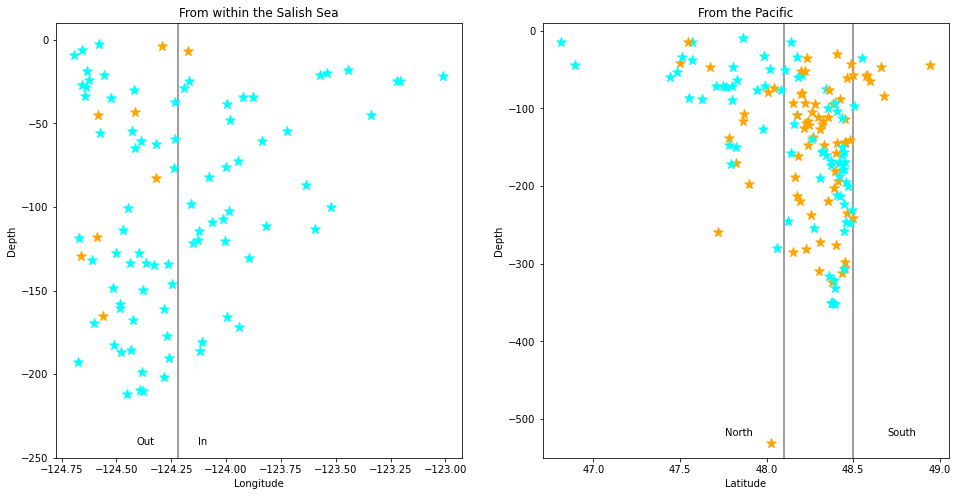

In [33]:
# split particles into to groups - those that come from the Salish Sea and those that come from the pacific
#cuttoff being a lon of -124.7

fig, ax = plt.subplots(1,2,figsize=(16,8))

n = 14 #number of particles being tracked

col = ['cyan','cyan','cyan','cyan','cyan','cyan','orange','orange','orange','orange','orange','orange','cyan','cyan','cyan','cyan','cyan','cyan']
months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17','jun17','jul17','aug17','sep17','oct17','nov17','dec17','jan18','feb18','mar18']
# months = ['oct16','nov16','dec16','jan17','feb17','mar17','apr17','may17']
for j in range(len(months)):
    if months[j][:3] == 'feb':
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_28'+months[j]+'/ariane_trajectories_qualitative.nc')
    else:
        file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30'+months[j]+'/ariane_trajectories_qualitative.nc')
    
    for i in range(n):
        if abs(file.traj_depth[479,i]-file.traj_depth[478,i])>0.001:
            if file.traj_lon[479,i] > -124.7:
                scat = ax[0].scatter(file.traj_lon[479,i],file.traj_depth[479,i],c=col[j], vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)
            else:
                scat = ax[1].scatter(file.traj_lat[479,i],file.traj_depth[479,i],c=col[j], vmin= 0, vmax=len(months), marker='*', s=100, zorder=4)

ax[0].set_title("From within the Salish Sea")                
ax[1].set_title("From the Pacific")
ax[0].set_ylabel('Depth')
ax[1].set_ylabel('Depth')
ax[0].set_xlabel('Longitude')
ax[1].set_xlabel('Latitude')
ax[0].set_ylim([-250,10])
ax[1].set_ylim([-550,10])

ax[0].plot([-124.22,-124.22],[-250,10],c='grey')
ax[1].plot([48.5,48.5],[-550,10],c='grey')
ax[1].plot([48.1,48.1],[-550,10],c='grey')

ax[0].text(0.35,0.03,"In", transform=ax[0].transAxes)
ax[0].text(0.2,0.03,"Out", transform=ax[0].transAxes)

ax[1].text(0.45,0.05,"North", transform=ax[1].transAxes)
ax[1].text(0.85,0.05,"South", transform=ax[1].transAxes)

# Boundary Selection

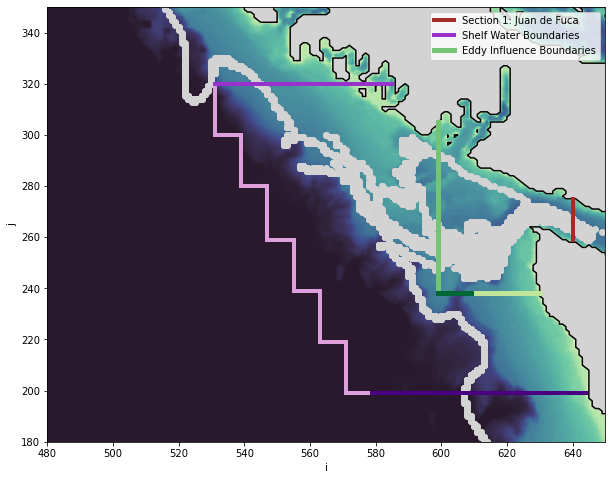

In [9]:
# Summer (aug)

file = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_qual/back_30aug17/ariane_trajectories_qualitative.nc')

fig, ax = plt.subplots(figsize=(10,8))

#Depth
c = ax.contourf(
mesh.mbathy[0,:,:]*10, levels=np.arange(0, 500.1, 5),
cmap=cm.cm.deep, extend='max',
)
    
#.. everything else
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([480, 650])
ax.set_ylim([180,350])
ax.set_xlabel('i')
ax.set_ylabel('j')

#boundary lines
# outer (saurav):
ax.plot([640,640],[259,275], lw=4, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([531,531],[319,300], 'plum',linewidth=4)#, label='Offshore')
ax.plot([531,539],[300,300], 'plum',linewidth=4)
ax.plot([539,539],[300,280], 'plum',linewidth=4)
ax.plot([539,547],[280,280], 'plum',linewidth=4)
ax.plot([547,547],[280,259], 'plum',linewidth=4)
ax.plot([547,555],[259,259], 'plum',linewidth=4)
ax.plot([555,555],[259,239], 'plum',linewidth=4)
ax.plot([563,555],[239,239], 'plum',linewidth=4)
ax.plot([563,563],[239,219], 'plum',linewidth=4)
ax.plot([563,571],[219,219], 'plum',linewidth=4)
ax.plot([571,571],[219,199], 'plum',linewidth=4)
ax.plot([571,578],[199,199], 'plum',linewidth=4)
ax.plot([531,585],[320,320], 'darkorchid',linewidth=4, label='Shelf Water Boundaries')
ax.plot([579,644],[199,199], 'indigo',linewidth=4)#, label='South (outer)')

# ax.plot([640,640],[259,275], lw=5, c='brown', label = "Section 1: Juan de Fuca")
ax.plot([609,630],[238,238], '#c2e699',linewidth=5)#, label='South (inner)')
ax.plot([599,599],[238,305], '#74c476',linewidth=5, label='Eddy Influence Boundaries')
ax.plot([609,599],[238,238], '#006837',linewidth=5)#, label='Canyon')

ax.legend()

n = 14
time = 1200
# Particle trajectories and depth
for p in range(n):
    lat = file.traj_lat[:,p]
    lon = file.traj_lon[:,p]
    ind = [np.unravel_index(np.argmin([np.abs(mesh.nav_lon - lon[i])+np.abs(mesh.nav_lat - lat[i])], axis=None), mesh.nav_lon.shape) for i in range(time)]
    ind = np.asarray(ind)
    ax.scatter(ind[:,1],ind[:,0],c='lightgrey')